In [14]:
import cv2
import pylab as plt
import numpy as np
%matplotlib inline

# Plots points given the target data and for each
# of the parameters of the segmentation
def scatter_plot(y, y_lab, path=None):
    plt.figure(1, figsize=(18, 4.5))
    plt.subplot(131)
    plt.plot(data[:, 0], y, 'ro') 
    plt.xlabel('Sigma seed')
    plt.ylabel(y_lab)
    plt.subplot(132)
    plt.plot(data[:, 1], y, 'ro') 
    plt.xlabel('Sigma watershed')
    plt.ylabel(y_lab)
    plt.subplot(133)
    plt.plot(data[:, 2], y, 'ro') 
    plt.xlabel('Mask size')
    plt.ylabel(y_lab)
    if path is not None:
        plt.savefig(path)
    plt.show()
        
# Plots the histograms of the parameters given a subset
# of the data
def bar_plot(data, title, path=None):
    plt.figure(1, figsize=(18, 4.5))
    plt.subplot(131)
    plt.hist(data[:, 0], len(set(data[:, 0])), normed=1, facecolor='g', alpha=0.75)
    plt.xlabel('Sigma seed')
    plt.ylabel('Count')
    plt.title(title)
    plt.subplot(132)
    plt.hist(data[:, 1], len(set(data[:, 1])), normed=1, facecolor='g', alpha=0.75)
    plt.xlabel('Sigma watershed')
    plt.ylabel('Count')
    plt.title(title)
    plt.subplot(133)
    plt.hist(data[:, 2], len(set(data[:, 2])), normed=1, facecolor='g', alpha=0.75)
    plt.xlabel('Mask size')
    plt.ylabel('Count')
    plt.title(title)
    if path is not None:
        plt.savefig(path)
        
# Gets top results of the data according to given criteria
def get_top(data, index, num):
    merges_sorted = np.argsort(data[:, index])
    s = data[merges_sorted, :]
    return s[0:num, :]

In [10]:
# Load data using numpy (Pandas not available)
# data_path = '/tmp/guest-P6APGC/neuron/snemi/00_prepare_data/segmentation_data/grid_search_B10.data'
data_path = '../tests/stats_grid_25.dat'
with open(data_path, 'r') as f:
    f.readline()  # skip the header
    data = np.loadtxt(f)

In [15]:
# Parameters vs Number of merges
scatter_plot(data[:, 7], 'Merges')
# scatter_plot(data[:, 7], 'Merges', 'merges_params.png')

1


RuntimeError: Could not create write struct

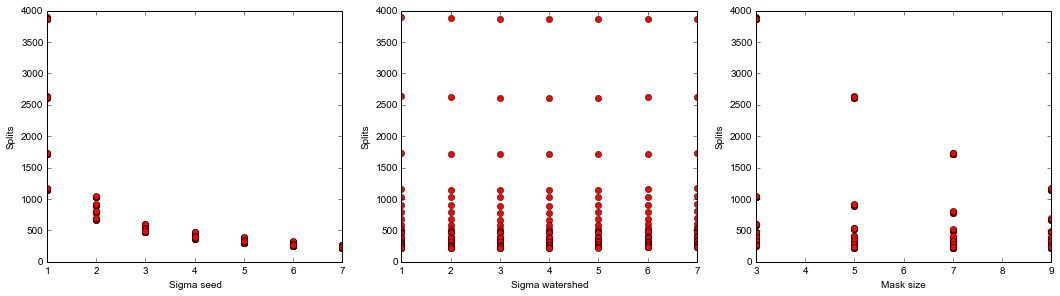

In [4]:
scatter_plot(data[:, 6], 'Splits') 
# scatter_plot(data[:, 6], 'splits_params.png')

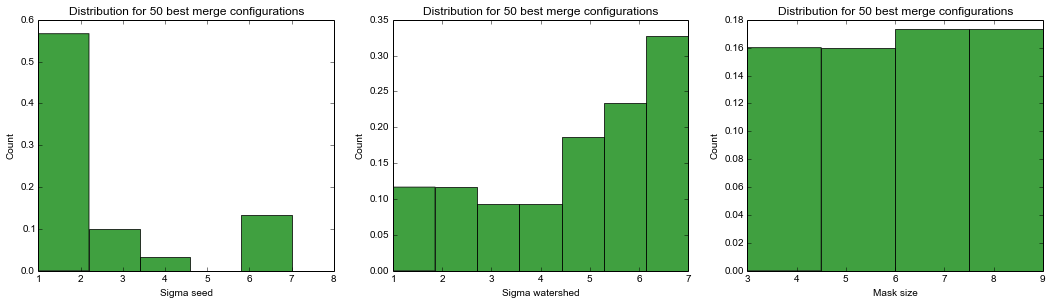

In [5]:
# Get top best merges and plot info
num_top = 50
top = get_top(data, 7, num_top)
# Generate plots
bar_plot(top, 'Distribution for ' + str(num_top) + ' best merge configurations')
# bar_plot(top, 'Distribution for ' + str(num_top) + ' best merge configurations', 'top_merges.png')

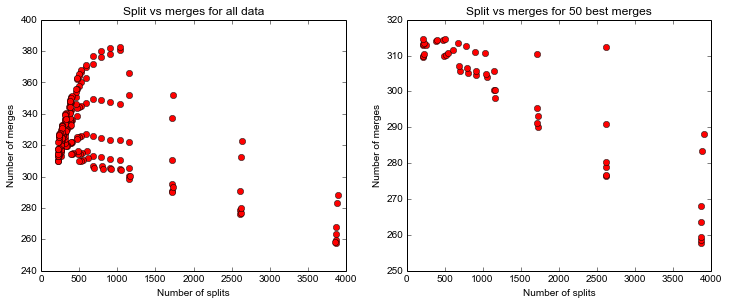

In [6]:
# Plot merges against splits
plt.figure(1, figsize=(12, 4.5))
plt.subplot(121)
plt.plot(data[:, 6], data[:, 7], 'ro')
plt.title('Split vs merges for all data')
plt.xlabel('Number of splits')
plt.ylabel('Number of merges')
plt.subplot(122)
plt.plot(top[:, 6], top[:, 7], 'ro')
plt.xlabel('Number of splits')
plt.ylabel('Number of merges')
plt.title('Split vs merges for ' + str(num_top) + ' best merges')
#plt.savefig('merge_vs_split_top.png')

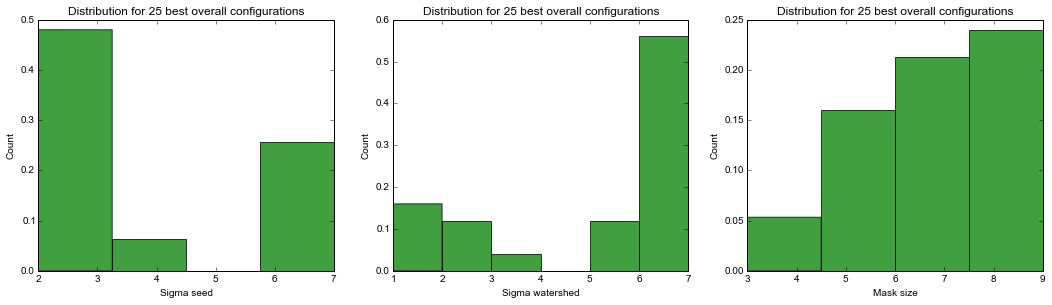

In [7]:
# Sort top results according to best split and take the half. Get top best merges and plot info
split_numtop = 25
split_top =  get_top(top, 6, split_numtop)
# Generate plots
bar_plot(split_top, 'Distribution for ' + str(split_numtop) + ' best overall configurations')
# bar_plot(split_top, 'Distribution for ' + str(split_numtop) + ' best overall configurations', 'best_overall.png')

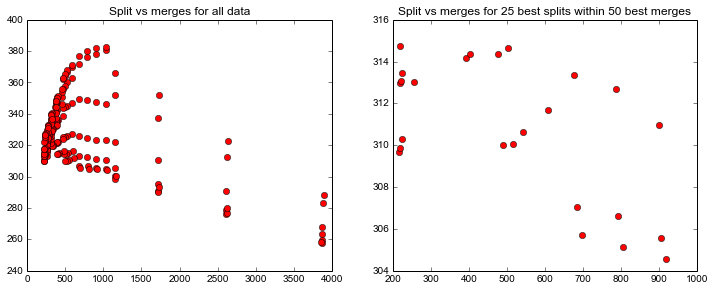

In [8]:
# Check data is correct
plt.figure(1, figsize=(12, 4.5))
plt.subplot(121)
plt.plot(data[:, 6], data[:, 7], 'ro')
plt.title('Split vs merges for all data')
plt.subplot(122)
plt.plot(split_top[:, 6], split_top[:, 7], 'ro')
plt.title('Split vs merges for ' + str(split_numtop) + ' best splits within ' + str(num_top) + ' best merges')

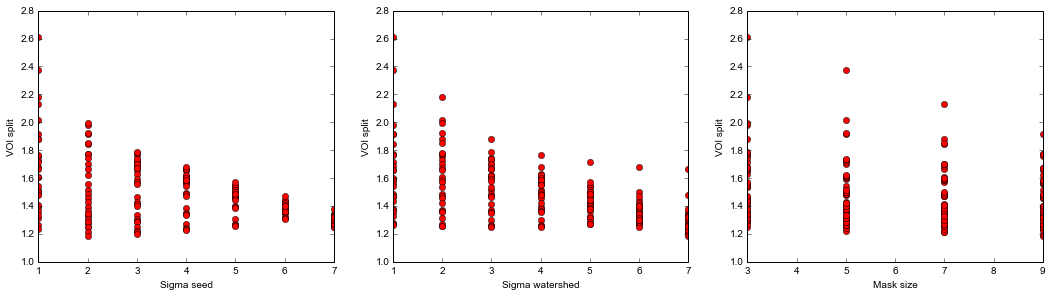

In [9]:
# Show VOI and RAND information
# Voi slit, voi merge, rand -> 3, 4, 5
scatter_plot(data[:, 3], 'VOI split')

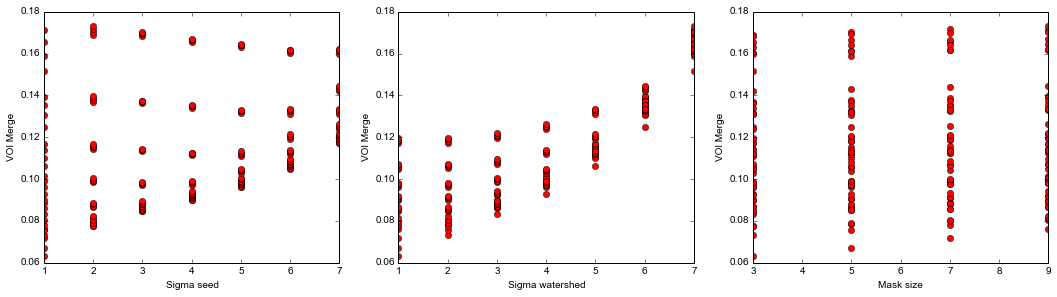

In [10]:
scatter_plot(data[:, 4], 'VOI Merge')

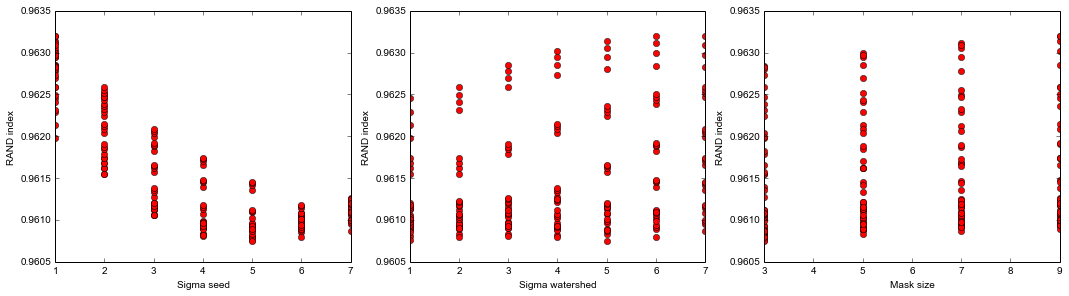

In [11]:
scatter_plot(data[:, 5], 'RAND index')

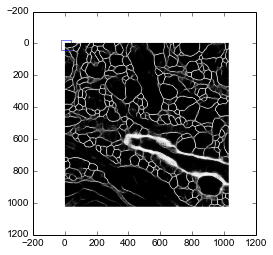

In [12]:
# Check size of border in real image 
membrane = cv2.imread('/tmp/guest-P6APGC/neuron/snemi/00_prepare_data/membrane/00000.png')
membrane2 = cv2.imread('/tmp/guest-P6APGC/neuron/snemi/00_prepare_data/membrane/00080.png')
import matplotlib.patches as patches
# Get two points fro the image
plt.imshow(membrane)
plt.plot(10, 10, '-s', markersize=10, fillstyle='none')
plt.show()

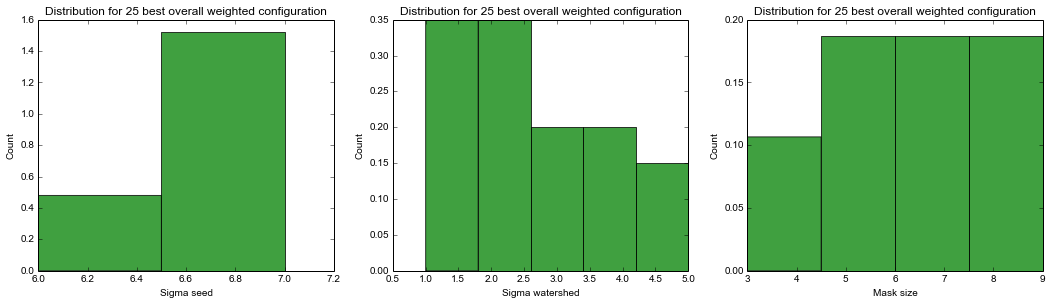

In [13]:
# Retrieve best results according to final score
data_scores = np.zeros((data.shape[0], data.shape[1]+1))
data_scores[:,:-1] = data
W = 10
num_scores = 25
# Add new column so merges are far more weighted and store score
data_scores[:, -1] = data_scores[:, 6] + data_scores[:, 7] * 10
top_scores = get_top(data_scores, 8, num_scores)
bar_plot(top_scores, 'Distribution for ' + str(num_scores) + ' best overall weighted configuration')

In [14]:
print top_scores

[[  7.00000000e+00   1.00000000e+00   9.00000000e+00   1.26444333e+00
    1.19684220e-01   9.61178780e-01   2.17280000e+02   3.09690000e+02
    3.31418000e+03]
 [  7.00000000e+00   1.00000000e+00   7.00000000e+00   1.27097232e+00
    1.18906352e-01   9.61159820e-01   2.20010000e+02   3.09870000e+02
    3.31871000e+03]
 [  7.00000000e+00   1.00000000e+00   5.00000000e+00   1.28155326e+00
    1.18098581e-01   9.61130130e-01   2.24990000e+02   3.10320000e+02
    3.32819000e+03]
 [  7.00000000e+00   2.00000000e+00   9.00000000e+00   1.25372695e+00
    1.19772713e-01   9.61228940e-01   2.18230000e+02   3.12980000e+02
    3.34803000e+03]
 [  7.00000000e+00   2.00000000e+00   7.00000000e+00   1.26012697e+00
    1.18979372e-01   9.61209490e-01   2.20970000e+02   3.13090000e+02
    3.35187000e+03]
 [  7.00000000e+00   2.00000000e+00   5.00000000e+00   1.26999011e+00
    1.18188120e-01   9.61179410e-01   2.25860000e+02   3.13470000e+02
    3.36056000e+03]
 [  7.00000000e+00   3.00000000e+00   9.